In [1]:
# Sebastian Lague Procedual Terrain Generation
# 3 noise maps 
# lacunarity 
# 1,2,4
# persistence how rapidly amplitude decreases
# 1, 2, .25




In [2]:
import torch

In [3]:
import os

# 设置 DISPLAY
os.environ["DISPLAY"] = ":0"
from direct.showbase.ShowBase import ShowBase
import filepath_p2

In [4]:

from panda3d.core import WindowProperties
from panda3d.core import (
    NodePath,
    WindowProperties,
    Vec3,
    TextNode,
    PNMImage, Texture,
    CardMaker,Point2,
    NodePath, Camera, PerspectiveLens,
    Point3, LVector3f
)
from art.basic import (
    create_cube_node, create_sphere_node,
uv_curve_surface,create_colored_cube_node
)

In [5]:
from art.procedural_art.perlin_landmap import fractal_perlin_custom_lac

In [6]:
from util.geometry import format_normal

In [7]:
noise = fractal_perlin_custom_lac(
    (512,512),
    (4,4),
    lacunarity_list=[1.5, 2.2, 2.8, 1.7, 3.0]
)
z = noise * 100
x = torch.ones_like(z)
y = torch.ones_like(z)
# x = x * torch.lin
x = x * torch.linspace(-256, 255, 512).unsqueeze(0)
y = y * torch.linspace(-256, 255, 512).unsqueeze(1)

In [8]:
xyz = torch.concat([
    x.unsqueeze(-1),
    y.unsqueeze(-1),
    z.unsqueeze(-1)
],dim=-1) 

In [9]:
landscape = uv_curve_surface(
    "land", xyz, False,False,
    vformat=format_normal
)

/mnt/D/packages/miniconda3/envs/game/lib/python3.12/site-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4381.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [10]:
from direct.showbase.ShowBase import ShowBase
from panda3d.core import (
    AmbientLight,
    DirectionalLight,
    PointLight,
    Shader,
    Material,
    Vec3,
    Vec4,
GeomNode
)
from panda3d_game.app import ContextShowBase
# Shader
# Application Class
# =================
normals = []

class ShaderDemo(ContextShowBase):
    def __init__(self):
        # Call the base constructor
        ContextShowBase.__init__(self)
        # self.sphere = create_sphere_node("sphere", lat_res=24, lon_res=24,vformat=format_normal)
        # self.sphere_np = NodePath(self.sphere)
        self.land = GeomNode("land")
        self.land.addGeom(landscape)
        self.land_np = NodePath(self.land)
        self.land_np.reparent_to(self.render)
        # self.indicator = create_sphere_node("sphere", lat_res=4, lon_res=24)
        # self.indicator_np = NodePath(self.indicator)
        # self.indicator_np.set_scale(.1)
        # self.indicator_np.reparent_to(self.render)


        # 创建材质

        mat = Material()
        mat.setAmbient((1, 1, 1, 1))# 环境光反射
        mat.setSpecular((0.5, 0.5, 0.5, 1))# 镜面光颜色
        mat.setShininess(20)# 镜面高光大小/锐利程度
        mat.setDiffuse((0.8, 0.8, 0.8, 1))  # RGB 越接近 1 越亮/浅  # 漫反射
        
        
        # self.sphere_np.setMaterial(mat)
        

        self.ambient_light = self.render.attach_new_node(AmbientLight("AmbientLight"))
        # self.ambient_light.node().set_color(Vec4(.2, .2, .2, 1))
        self.ambient_light.node().set_color(Vec4(.2, .2, .2, 1))
        self.render.set_light(self.ambient_light)
        
        self.sun = self.render.attach_new_node(DirectionalLight("Sun"))
        self.sun.set_hpr(45, -45, 0)
        self.render.set_light(self.sun)
        
        self.green_light = self.render.attach_new_node(PointLight("GreenLight"))
        self.green_light.node().set_color(Vec4(0, 1, 0, 1))
        self.green_light.node().set_attenuation(Vec3(1, .1, .5))
        self.green_light.node().set_attenuation(Vec3(1, 0.1, 0.05))
        self.green_light.node().set_attenuation(Vec3(1,0,0))
        self.green_light.set_pos(0, 3, 100)
        self.render.set_light(self.green_light)
        # # self.indicator_np.set_pos(0,3,0)
        

        # geom = self.sphere_np.node().getGeom(0)
        # vdata = geom.getVertexData()
        # print(vdata.hasColumn("normal"))
        # from panda3d.core import GeomVertexReader
        # normal_reader = GeomVertexReader(vdata, "normal")
        # while not normal_reader.isAtEnd():
        #     n = normal_reader.getData3f()
        #     normals.append(n)
        # print(normals[:10])

        # self.sphere_shader = Shader.make(
        #     Shader.SL_GLSL,
        #     sphere_vert_diffuse,
        #     # sphere_frag_diffuse
        #     sphere_frag_0
        #     # specular_vert,
        #     # specular_frag
        #     # sphere_vert,
        #     # sphere_frag_ambient
        # )
        # self.sphere_np.set_pos(0, 5, 0)
        # self.sphere_np.set_shader(self.sphere_shader)
        # self.sphere_np.reparent_to(self.render)

    def pause_switch(self, *args,**kwargs):
        pass





In [11]:
from qpanda3d import QShowBase, QPanda3DWidget, QControl, Synchronizer
from demos.physics_room import PhyscRoomConsole
class ShaderControl(ShaderDemo, QControl):
    def __init__(self, isQt = True):
        import pdb
        QControl.__init__(self)
        ShaderDemo.__init__(self)
        self.isQt = isQt
        if self.isQt:
            self.startQt()
from demos.physics_room import PhyscRoomConsole
from ui.qtui import *

class ShaderGame(RawQtGUI):
    def get_game(self):
        return ShaderControl()

    def get_console(self):
        return PhyscRoomConsole(showbase=self.panda3d)

if __name__ == '__main__':
    # torch.set_printoptions(precision=16, sci_mode=False)
    import sys
    app = QApplication(sys.argv)
    window = ShaderGame()
    window.show()
    sys.exit(app.exec_())

Known pipe types:
  glxGraphicsPipe
(all display modules loaded.)
/opt/amdgpu/share/libdrm/amdgpu.ids: No such file or directory
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager
:audio(error): Couldn't open default OpenAL device
:audio(error): OpenALAudioManager: No open device or context
:audio(error):   OpenALAudioManager is not valid, will use NullAudioManager


SystemExit: 0

/mnt/D/packages/miniconda3/envs/game/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3709: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
noise = fractal_perlin_custom_lac(
    (512,512),
    (4,4),
    lacunarity_list=[1,2,4],
    persistence_list=[1,.5,.25]
)

In [ ]:
noise = fractal_perlin_custom_lac(
    (512,512),
    (4,4),
    lacunarity_list=[1.5, 2.2, 2.8, 1.7, 3.0]
)

In [13]:
noise.shape

torch.Size([512, 512])

In [14]:
import seaborn as sns

In [26]:
import matplotlib.pyplot as plt

<Axes: >

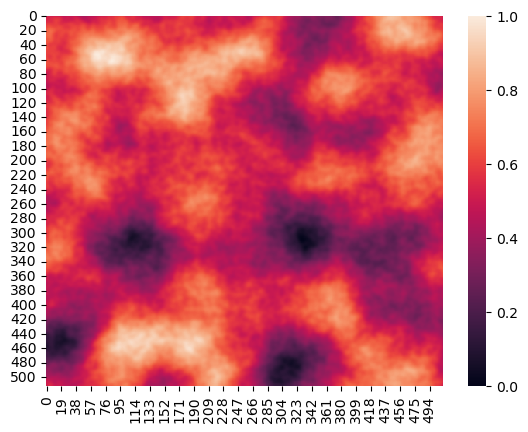

In [27]:
sns.heatmap(noise)

In [28]:
import os

# 设置 DISPLAY
os.environ["DISPLAY"] = ":0"
from direct.showbase.ShowBase import ShowBase
from panda3d.core import WindowProperties

In [ ]:
# get uv coordinate
# x_range: 